### Global Country Development and Prosperity Index

In this project, we will utilize clustering to find out the following questions:
- How do economic measurements impact the average score of a country?
- How do social measurements impact the average score of a country?

Clustering will be used to see the relations between particular variables and the country's average score in the dataset. The goal of this project is to see whether economic variables or social variables impact the average score more.


dataset link: https://www.kaggle.com/datasets/tarktunataalt/2023-global-country-development-and-prosperity-index


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv('country-data.csv')
df.head()

,Country,AveragScore,SafetySecurity,PersonelFreedom,Governance,SocialCapital,InvestmentEnvironment,EnterpriseConditions,MarketAccessInfrastructure,EconomicQuality,LivingConditions,Health,Education,NaturalEnvironment
0,Denmark,84.55,92.59,94.09,89.45,82.56,82.42,79.64,78.79,76.81,95.77,81.07,87.48,73.94
1,Sweden,83.67,90.97,91.90,86.41,78.29,82.81,75.54,79.67,76.18,95.33,82.28,85.92,78.74
2,Norway,83.59,93.30,94.10,89.66,79.03,82.24,75.95,75.87,77.25,94.70,82.98,85.68,72.37
3,Finland,83.47,89.56,91.96,90.41,77.27,84.12,77.25,78.77,70.28,94.46,81.19,88.38,77.99
4,Switzerland,83.42,95.66,87.50,87.67,69.14,80.81,83.84,78.65,79.71,94.66,82.11,87.72,73.60


Here we have quite a few variables:
- `Country`
- `AveragScore`
- `SafetySecurity`
- `PersonelFreedom`
- `Governance`
- `SocialCapital`
- `InvestmentEnvironment`
- `EnterpriseConditions`
- `MarketAccessInfrastructure`
- `EconomicQuality`
- `LivingConditions`
- `Health`
- `Education`
- `NaturalEnvironment`

Our economic variables will be split as:
- `InvestmentEnvironment`
- `EnterpriseConditions`
- `MarketAccessInfrastructure`
- `EconomicQuality`


Our social variables will be split as:
- `SafetySecurity`
- `PersonelFreedom`
- `Governance`
- `SocialCapital`
- `LivingConditions`
- `Health`
- `Education`
- `NaturalEnvironment`

#### Understanding the Data - Part 1


To start, it appears that each variable in the dataset could potentially be useful for future endeavors. So, we won't be deleting any columns right off the bat.

In [10]:
df.describe()

,AveragScore,SafetySecurity,PersonelFreedom,Governance,SocialCapital,InvestmentEnvironment,EnterpriseConditions,MarketAccessInfrastructure,EconomicQuality,LivingConditions,Health,Education,NaturalEnvironment
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,58.056228,67.242515,56.829401,50.360299,54.468024,53.013653,54.791677,55.019701,51.568683,69.803293,68.624910,58.723772,56.231737
std,13.309964,17.542279,19.914638,17.747092,10.350639,16.743723,12.876166,15.849004,13.427811,19.752677,11.166266,19.679023,9.061262
min,30.400000,16.540000,16.160000,13.090000,23.010000,21.690000,20.500000,24.230000,24.460000,19.210000,31.950000,16.780000,33.670000
25%,47.770000,59.290000,39.650000,37.470000,47.820000,40.765000,45.830000,40.055000,41.295000,55.830000,60.595000,44.355000,50.265000
50%,57.530000,68.930000,57.170000,47.510000,54.390000,51.250000,53.520000,56.590000,50.060000,74.770000,71.380000,61.930000,55.540000
75%,66.860000,80.560000,72.865000,60.965000,60.610000,64.640000,62.760000,69.060000,62.555000,86.975000,77.340000,74.130000,61.940000
max,84.550000,96.320000,94.100000,90.410000,82.560000,84.990000,83.840000,85.750000,80.100000,95.860000,86.890000,91.440000,78.740000


When looking at the dataset as a whole, we can see how it could reflect how the world is doing (in general) in the various sectors.

In [12]:
df.isna().sum()

Country                       0
AveragScore                   0
SafetySecurity                0
PersonelFreedom               0
Governance                    0
SocialCapital                 0
InvestmentEnvironment         0
EnterpriseConditions          0
MarketAccessInfrastructure    0
EconomicQuality               0
LivingConditions              0
Health                        0
Education                     0
NaturalEnvironment            0
dtype: int64

No null values!

In [14]:
df.dtypes

Country                        object
AveragScore                   float64
SafetySecurity                float64
PersonelFreedom               float64
Governance                    float64
SocialCapital                 float64
InvestmentEnvironment         float64
EnterpriseConditions          float64
MarketAccessInfrastructure    float64
EconomicQuality               float64
LivingConditions              float64
Health                        float64
Education                     float64
NaturalEnvironment            float64
dtype: object

Great! It looks like all our data is consistent! Since we aren't going to do any further preprocessing as of now, we will create some visualizations to further understand the data!

#### Understanding the Data - Part 2

Here we will visualize our data be splitting it up based on its average score. First we'll need to take a look at the smallest possible value, since we can already tell that the highest value is 84.55 from looking at the `df.head()` from before.

In [18]:
df.nsmallest(5, 'AveragScore')

,Country,AveragScore,SafetySecurity,PersonelFreedom,Governance,SocialCapital,InvestmentEnvironment,EnterpriseConditions,MarketAccessInfrastructure,EconomicQuality,LivingConditions,Health,Education,NaturalEnvironment
166,South Sudan,30.40,16.54,26.98,22.16,36.10,33.34,37.52,32.89,32.30,21.99,35.69,18.99,50.35
165,Yemen,32.65,22.60,25.30,18.20,38.44,22.76,33.12,30.93,28.81,41.58,57.45,28.12,44.49
164,Central African Republic,32.83,35.30,36.83,28.40,36.72,26.32,40.21,25.49,40.34,19.21,31.95,18.62,54.57
163,Afghanistan,34.18,20.93,31.02,29.47,31.17,30.25,42.01,29.67,33.75,39.74,50.91,27.11,44.11
162,Somalia,34.39,31.91,34.32,23.80,43.50,31.16,41.79,26.75,28.23,32.07,44.38,26.32,48.46


As the smallest score is 30.40, our range of applicable values is between 84.55 - 30.40. This gives us a range of 54.15 values (from subtracting 84.55-30.40). 

Let's try to quarter out this range. We will take 54.15/4 = 13.5375 and subtract it starting from 84.55. This will give us the following ranges:
- `84.55 - 71.0125`
- `71.0124 - 57.475`
- `57.474 - 43.9375`
- `43.9374 - 30.40`

In [20]:
df1 = df[df['AveragScore'] >= 71.0125]
df1

,Country,AveragScore,SafetySecurity,PersonelFreedom,Governance,SocialCapital,InvestmentEnvironment,EnterpriseConditions,MarketAccessInfrastructure,EconomicQuality,LivingConditions,Health,Education,NaturalEnvironment
0,Denmark,84.55,92.59,94.09,89.45,82.56,82.42,79.64,78.79,76.81,95.77,81.07,87.48,73.94
1,Sweden,83.67,90.97,91.90,86.41,78.29,82.81,75.54,79.67,76.18,95.33,82.28,85.92,78.74
2,Norway,83.59,93.30,94.10,89.66,79.03,82.24,75.95,75.87,77.25,94.70,82.98,85.68,72.37
3,Finland,83.47,89.56,91.96,90.41,77.27,84.12,77.25,78.77,70.28,94.46,81.19,88.38,77.99
4,Switzerland,83.42,95.66,87.50,87.67,69.14,80.81,83.84,78.65,79.71,94.66,82.11,87.72,73.60
5,Netherlands,82.32,91.19,90.08,87.34,74.03,84.11,79.09,80.82,74.34,95.86,82.05,86.43,62.49
6,Luxembourg,81.83,96.32,89.20,86.31,66.60,78.91,80.72,80.03,76.93,94.56,81.59,78.79,71.98
7,Iceland,81.02,91.64,88.74,83.30,77.75,79.20,72.86,76.07,69.92,93.82,82.72,85.19,71.01
8,Germany,80.81,87.92,87.70,84.39,65.96,78.87,79.70,80.23,73.96,94.42,81.41,83.45,71.69
9,New Zealand,80.47,85.07,87.56,87.19,79.88,82.58,72.82,74.60,69.88,90.66,79.84,83.89,71.71


In [21]:
df1.describe()

,AveragScore,SafetySecurity,PersonelFreedom,Governance,SocialCapital,InvestmentEnvironment,EnterpriseConditions,MarketAccessInfrastructure,EconomicQuality,LivingConditions,Health,Education,NaturalEnvironment
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,77.893714,87.577429,82.116286,77.872857,65.826857,77.711429,73.483143,75.759714,70.364286,92.560000,80.454571,83.339714,67.672000
std,3.848072,6.627054,9.761340,8.186025,9.455383,5.404357,6.312401,4.225893,6.028002,1.986513,2.977164,3.631977,6.546341
min,71.150000,59.600000,48.630000,61.930000,43.820000,67.160000,58.140000,67.920000,57.770000,87.880000,73.260000,72.750000,53.200000
25%,74.590000,86.075000,78.955000,72.395000,60.785000,73.750000,69.130000,71.995000,65.605000,91.415000,79.360000,81.315000,64.055000
50%,77.840000,87.920000,84.530000,79.120000,65.960000,79.420000,73.420000,76.330000,70.960000,92.780000,80.540000,83.890000,69.150000
75%,80.640000,91.080000,87.700000,83.845000,73.755000,81.865000,78.715000,78.780000,74.465000,93.990000,82.080000,85.745000,72.175000
max,84.550000,96.320000,94.100000,90.410000,82.560000,84.990000,83.840000,85.750000,80.100000,95.860000,86.890000,91.440000,78.740000


In [22]:
df2 = df[(df['AveragScore'] <= 71.0124) & (df['AveragScore'] >= 57.475)]
df2

,Country,AveragScore,SafetySecurity,PersonelFreedom,Governance,SocialCapital,InvestmentEnvironment,EnterpriseConditions,MarketAccessInfrastructure,EconomicQuality,LivingConditions,Health,Education,NaturalEnvironment
35,Chile,70.18,70.27,76.35,66.98,59.48,68.54,65.54,73.21,63.25,87.70,76.06,73.47,61.29
36,Poland,70.15,86.74,67.09,58.03,63.27,64.73,61.93,69.73,63.63,90.01,76.31,78.63,61.76
37,Uruguay,69.69,79.43,84.87,72.82,66.76,65.19,55.77,61.59,55.53,86.04,77.98,70.64,59.61
38,Costa Rica,69.59,77.80,84.74,68.00,63.45,60.40,60.33,63.92,55.84,81.25,79.09,71.71,68.58
39,Greece,68.48,84.20,73.30,60.81,52.31,56.60,59.82,73.33,49.58,89.75,77.43,79.34,65.35
40,Croatia,68.24,84.39,75.16,56.15,52.19,60.65,52.72,72.04,60.36,88.50,75.74,73.54,67.45
41,Hungary,66.88,83.80,60.36,45.75,59.51,62.10,51.62,68.01,66.05,88.37,76.70,77.34,62.95
42,Malaysia,66.84,70.81,46.90,57.23,57.90,73.49,69.24,70.62,64.98,79.52,77.35,72.94,61.07
43,United Arab Emirates,66.69,77.15,31.27,63.51,55.16,70.06,71.89,75.34,66.79,84.88,78.38,74.72,51.11
44,Romania,66.40,83.65,73.56,57.11,49.96,63.04,54.16,66.39,62.04,82.30,73.02,70.47,61.11


In [23]:
df2.describe()

,AveragScore,SafetySecurity,PersonelFreedom,Governance,SocialCapital,InvestmentEnvironment,EnterpriseConditions,MarketAccessInfrastructure,EconomicQuality,LivingConditions,Health,Education,NaturalEnvironment
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,62.259592,70.881020,58.533673,51.748571,57.199184,57.207551,56.248163,62.160816,56.035510,79.626939,73.517143,67.566531,56.389796
std,3.800287,11.277353,16.702525,8.067952,5.042271,7.071887,6.152442,6.528866,7.019505,6.730409,4.649550,7.637068,6.738100
min,57.530000,36.590000,20.870000,35.770000,45.870000,40.800000,45.280000,43.980000,41.070000,59.670000,59.070000,52.100000,44.410000
25%,59.110000,67.530000,46.900000,46.320000,53.310000,53.500000,52.520000,58.400000,51.190000,76.360000,71.380000,62.000000,50.970000
50%,60.930000,72.100000,62.770000,48.480000,58.180000,57.290000,55.290000,61.590000,55.530000,79.750000,74.110000,68.680000,56.400000
75%,65.550000,78.670000,69.410000,57.230000,60.990000,61.220000,59.590000,66.660000,60.830000,84.840000,76.700000,72.790000,61.290000
max,70.180000,86.960000,84.870000,72.820000,66.760000,73.490000,71.890000,75.340000,73.550000,90.010000,83.110000,81.870000,69.350000


In [24]:
df3 = df[(df['AveragScore'] <= 57.474) & (df['AveragScore'] >= 43.9375)]
df3

,Country,AveragScore,SafetySecurity,PersonelFreedom,Governance,SocialCapital,InvestmentEnvironment,EnterpriseConditions,MarketAccessInfrastructure,EconomicQuality,LivingConditions,Health,Education,NaturalEnvironment
84,Ecuador,57.42,67.60,63.66,42.88,57.09,46.58,47.06,57.33,42.97,69.69,71.80,62.24,60.18
85,Jordan,57.14,70.52,43.66,49.44,40.45,60.82,63.45,59.81,41.70,80.08,68.92,60.79,46.02
86,São Tomé and Príncipe,57.09,79.74,69.60,51.43,52.89,49.05,54.85,42.38,50.57,60.41,70.54,48.95,54.62
87,Mongolia,57.07,74.24,66.26,49.25,58.78,42.92,48.78,45.97,50.62,66.51,66.74,69.12,45.61
88,Guyana,56.93,66.51,64.68,48.58,53.18,46.18,47.82,47.04,54.77,74.54,62.47,56.87,60.54
89,Namibia,56.38,73.44,67.70,58.26,53.48,53.49,59.04,50.90,39.77,56.79,60.64,49.00,54.03
90,Sri Lanka,56.34,53.60,53.52,48.05,56.64,48.84,54.86,52.27,40.95,67.10,76.58,65.06,58.62
91,Azerbaijan,56.26,63.47,32.61,40.52,46.55,60.26,60.03,58.45,54.66,78.82,71.25,63.49,45.05
92,Belize,55.91,67.49,69.68,44.75,49.95,42.54,49.06,52.22,41.64,72.34,70.61,51.09,59.59
93,Kyrgyzstan,55.75,71.90,51.09,41.34,52.43,46.87,46.08,46.98,49.00,74.77,72.46,61.57,54.46


In [25]:
df3.describe()

,AveragScore,SafetySecurity,PersonelFreedom,Governance,SocialCapital,InvestmentEnvironment,EnterpriseConditions,MarketAccessInfrastructure,EconomicQuality,LivingConditions,Health,Education,NaturalEnvironment
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,50.718621,62.634310,48.336207,41.560517,49.864138,44.524655,49.341897,46.007414,43.338276,59.695517,63.749828,47.986724,51.582069
std,4.209271,10.120939,13.251320,7.872008,7.063075,7.074991,6.839234,8.277800,5.782167,13.278285,8.655203,11.841212,6.694201
min,44.000000,26.940000,17.090000,26.950000,33.690000,28.090000,32.600000,27.920000,30.930000,30.000000,41.300000,22.030000,33.670000
25%,46.982500,59.215000,38.830000,36.467500,44.630000,39.552500,44.865000,38.957500,39.642500,48.350000,57.522500,39.062500,46.032500
50%,50.710000,65.155000,49.735000,40.690000,50.965000,42.800000,49.815000,46.265000,43.020000,58.530000,64.915000,45.715000,53.440000
75%,54.295000,68.230000,57.897500,47.915000,54.495000,48.347500,53.357500,51.945000,46.882500,71.462500,70.602500,57.110000,56.577500
max,57.420000,79.740000,69.680000,60.040000,64.230000,60.820000,64.330000,66.380000,54.770000,80.960000,79.530000,70.430000,60.540000


In [26]:
df4 = df[(df['AveragScore'] <= 43.9374)]
df4

,Country,AveragScore,SafetySecurity,PersonelFreedom,Governance,SocialCapital,InvestmentEnvironment,EnterpriseConditions,MarketAccessInfrastructure,EconomicQuality,LivingConditions,Health,Education,NaturalEnvironment
142,Myanmar,43.66,36.85,20.70,33.81,58.60,27.13,41.14,44.34,38.29,52.94,66.74,47.83,55.54
143,Sierra Leone,43.62,63.88,56.97,43.11,53.79,32.54,41.57,30.25,32.76,36.43,48.26,30.75,53.15
144,Venezuela,43.60,40.45,36.63,13.09,58.30,21.69,20.50,43.34,26.44,69.82,69.61,61.10,62.22
145,Libya,43.46,30.16,38.88,24.48,50.31,27.84,32.88,39.67,45.75,71.57,67.84,48.82,43.26
146,Cameroon,43.08,36.72,39.20,31.42,47.60,36.85,45.56,38.29,43.11,47.74,51.02,47.74,51.78
147,Congo,42.82,53.76,38.38,28.94,41.57,36.59,40.03,35.48,34.70,48.23,54.10,47.62,54.48
148,Guinea-Bissau,42.78,75.86,53.23,35.05,49.05,27.79,41.51,31.39,33.39,38.39,50.87,19.96,56.82
149,Mozambique,42.70,54.24,52.63,39.16,47.69,35.74,41.32,35.86,32.49,35.81,52.84,24.36,60.30
150,Mali,42.36,34.04,56.61,39.48,46.76,33.56,44.19,36.01,41.81,47.73,54.47,19.61,54.04
151,Niger,42.26,50.94,55.79,41.21,55.83,34.33,44.58,27.85,41.53,31.89,54.60,16.78,51.81


In [27]:
df4.describe()

,AveragScore,SafetySecurity,PersonelFreedom,Governance,SocialCapital,InvestmentEnvironment,EnterpriseConditions,MarketAccessInfrastructure,EconomicQuality,LivingConditions,Health,Education,NaturalEnvironment
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,39.068400,42.333200,37.791600,29.537200,43.893600,29.911200,38.412400,32.895600,35.594400,42.139600,53.784800,31.839600,50.692800
std,4.212103,15.521401,11.951184,7.717811,8.599231,4.821037,6.200286,5.151918,5.678546,13.689785,9.429277,11.637712,5.902288
min,30.400000,16.540000,16.160000,13.090000,23.010000,21.690000,20.500000,24.230000,24.460000,19.210000,31.950000,16.780000,39.500000
25%,35.740000,31.910000,29.290000,23.800000,38.440000,26.140000,33.120000,29.500000,32.450000,31.890000,50.870000,24.360000,47.040000
50%,40.550000,39.610000,38.280000,28.940000,42.950000,30.250000,40.030000,31.680000,34.700000,41.260000,54.100000,29.610000,51.810000
75%,42.780000,53.760000,43.550000,35.050000,49.280000,33.560000,41.790000,35.860000,40.340000,47.740000,58.160000,34.220000,54.040000
max,43.660000,75.860000,56.970000,43.110000,58.600000,36.850000,49.760000,44.340000,45.750000,71.570000,69.610000,61.100000,62.220000


Now with this sectioned information we will then create a line graph that visualizes each dataframe. This will help put into context the differences between dataframes.

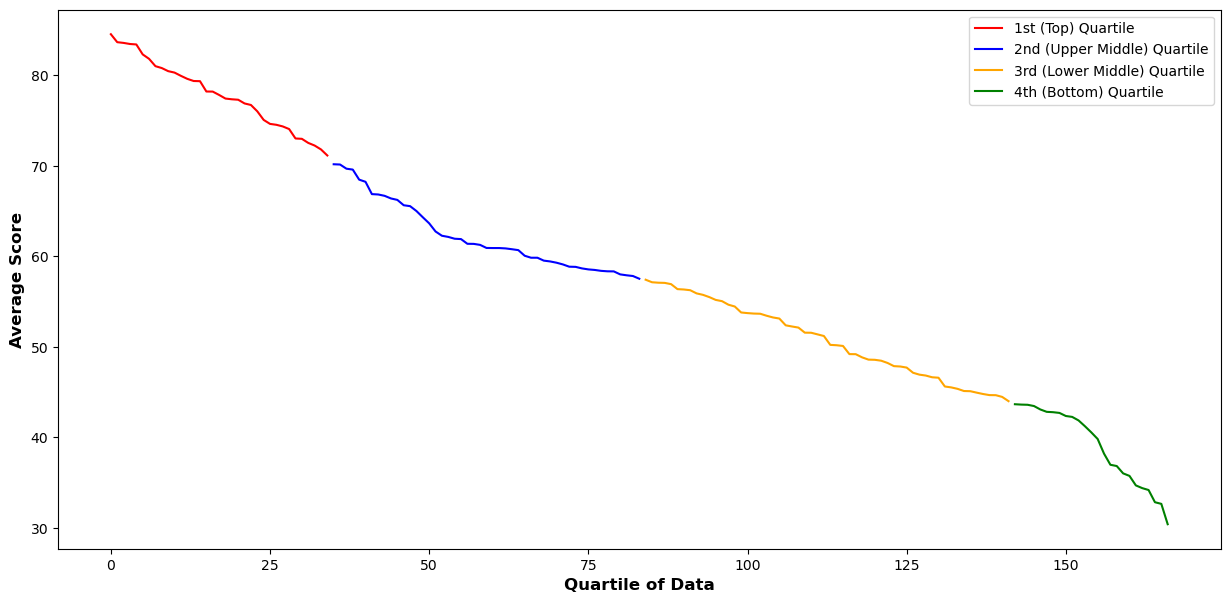

In [29]:
plt.figure(figsize=(15,7))
plt.plot(df1.index, df1["AveragScore"], color='red', label='1st (Top) Quartile')
plt.plot(df2.index, df2["AveragScore"], color='blue', label='2nd (Upper Middle) Quartile')
plt.plot(df3.index, df3["AveragScore"], color='orange', label='3rd (Lower Middle) Quartile')
plt.plot(df4.index, df4["AveragScore"], color='green', label='4th (Bottom) Quartile')
plt.xlabel("Quartile of Data", fontsize=12, fontweight="bold")
plt.ylabel("Average Score", fontsize=12, fontweight="bold")
plt.legend()
plt.show()

Here we can see the sheer disparity between the Top and Bottom quarters of the dataset. Since we now understand a bit more of our data, we can dive into clustering!

#### Clustering

We will begin our clustering based on the values of the economic markers of the dataset. We want to explore the question: _How do economic measurements impact the average score of a country?_
<br>
Namely, we will use:
<br>
- `AveragScore`
- `InvestmentEnvironment`
- `EnterpriseConditions`
- `MarketAccessInfrastructure`
- `EconomicQuality`

In [33]:
from sklearn.cluster import KMeans

In [95]:
#place economic markers in a dataframe given to the X variable
X = df[['AveragScore', 'InvestmentEnvironment','EnterpriseConditions', 'MarketAccessInfrastructure', 'EconomicQuality']]

C:\Users\thaot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\thaot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\thaot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\thaot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

Text(0, 0.5, 'Variance')

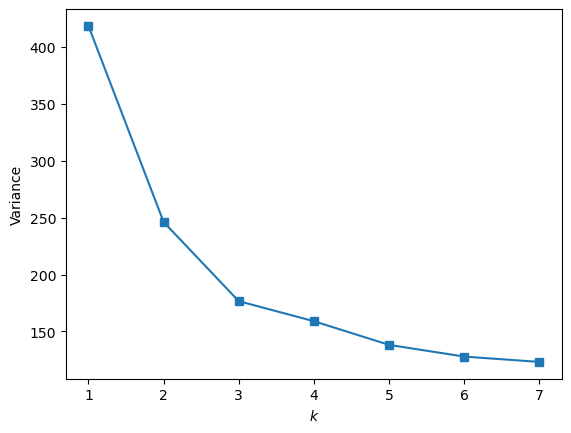

In [35]:
inertia1 = []
for k in range(1,8):
    kmeans = KMeans(n_clusters=k, random_state=1, n_init = 'auto').fit(X)
    inertia1.append(np.sqrt(kmeans.inertia_))
    
plt.plot(range(1, 8), inertia1, marker='s');
plt.xlabel('$k$')
plt.ylabel('Variance')


Here we will have our k=2, as that is where it appears to be the best fit. The drop in variance seems to slow around this point.

In [37]:
kmeans = KMeans(n_clusters=3, random_state=1, n_init=10).fit(X)

C:\Users\thaot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [38]:
y = kmeans.fit_predict(X)

C:\Users\thaot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [39]:
df['cluster'] = y
df.head()

,Country,AveragScore,SafetySecurity,PersonelFreedom,Governance,SocialCapital,InvestmentEnvironment,EnterpriseConditions,MarketAccessInfrastructure,EconomicQuality,LivingConditions,Health,Education,NaturalEnvironment,cluster
0,Denmark,84.55,92.59,94.09,89.45,82.56,82.42,79.64,78.79,76.81,95.77,81.07,87.48,73.94,1
1,Sweden,83.67,90.97,91.90,86.41,78.29,82.81,75.54,79.67,76.18,95.33,82.28,85.92,78.74,1
2,Norway,83.59,93.30,94.10,89.66,79.03,82.24,75.95,75.87,77.25,94.70,82.98,85.68,72.37,1
3,Finland,83.47,89.56,91.96,90.41,77.27,84.12,77.25,78.77,70.28,94.46,81.19,88.38,77.99,1
4,Switzerland,83.42,95.66,87.50,87.67,69.14,80.81,83.84,78.65,79.71,94.66,82.11,87.72,73.60,1


<Axes: xlabel='AveragScore', ylabel='InvestmentEnvironment'>

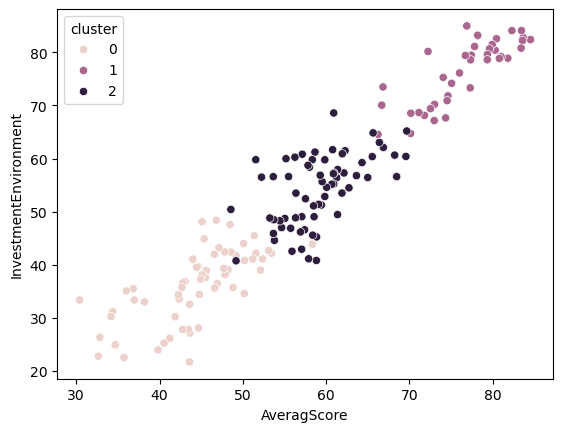

In [40]:
sns.scatterplot(x = df['AveragScore'], y = df['InvestmentEnvironment'], hue=df['cluster'])

It appears that there can easily be three clusters in this plot. Countries with a higher average score (mostly 1st quartile countries) have a higher measured value for InvestmentEnvironment. This is not completely unexpected to see. 

Let's see what it looks like for the rest of the economic variables.

<Axes: xlabel='AveragScore', ylabel='EnterpriseConditions'>

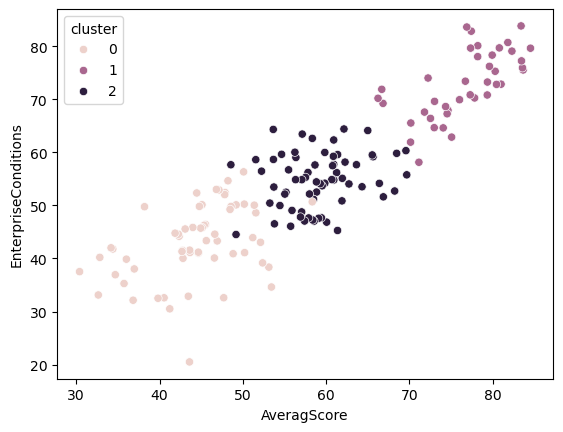

In [42]:
sns.scatterplot(x = df['AveragScore'], y = df['EnterpriseConditions'], hue=df['cluster'])

<Axes: xlabel='AveragScore', ylabel='MarketAccessInfrastructure'>

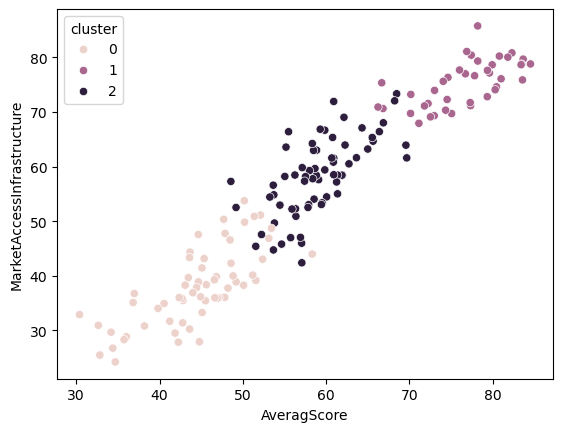

In [43]:
sns.scatterplot(x = df['AveragScore'], y = df['MarketAccessInfrastructure'], hue=df['cluster'])

<Axes: xlabel='AveragScore', ylabel='EconomicQuality'>

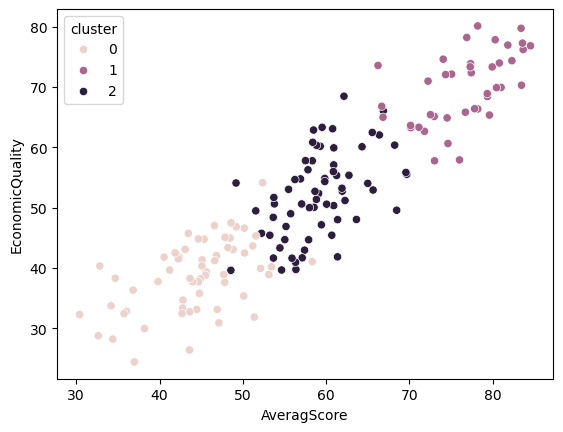

In [44]:
sns.scatterplot(x = df['AveragScore'], y = df['EconomicQuality'], hue=df['cluster'])

#### Now lets look at clusters for our next question:
We want to explore the question: _How do social measurements impact the average score of a country?_
<br>
This time we will use:
<br>
- `AveragScore`
- `SafetySecurity`
- `PersonelFreedom`
- `Governance`
- `SocialCapital`
- `LivingConditions`
- `Health`
- `Education`
- `NaturalEnvironment`


In [93]:
#place social variables inside a dataframe to the X2 variable
X2 = df2[['AveragScore', 'SafetySecurity', 'PersonelFreedom', 'Governance', 'SocialCapital', 'LivingConditions', 'Health', 'Education', 'NaturalEnvironment']]

C:\Users\thaot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\thaot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\thaot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\thaot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

Text(0, 0.5, 'Variance')

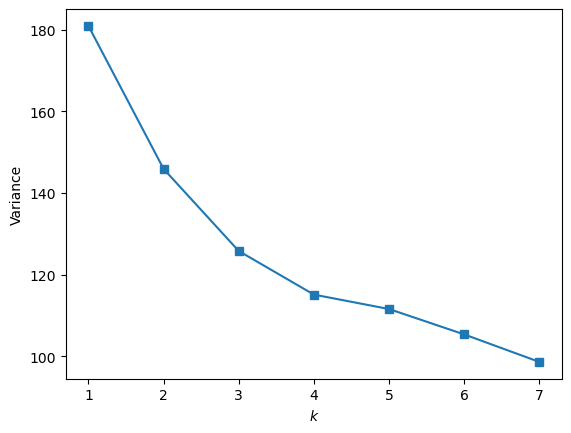

In [47]:
inertia2 = []
for k in range(1,8):
    kmeans = KMeans(n_clusters=k, random_state=1, n_init = 'auto').fit(X2)
    inertia2.append(np.sqrt(kmeans.inertia_))
    
plt.plot(range(1, 8), inertia2, marker='s');
plt.xlabel('$k$')
plt.ylabel('Variance')

Here we will have our k=3, as that is where it appears to be the best fit. The drop in variance seems to slow around this point and the distances seem to become more even.

In [48]:
kmeans = KMeans(n_clusters = 3, random_state = 1,n_init= 10).fit(X2)
y2 = kmeans.fit_predict(X2)
df2['cluster'] = y2
df2.head()

C:\Users\thaot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\thaot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\thaot\AppData\Local\Temp\ipykernel_17456\950193036.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['cluster'] = y2


,Country,AveragScore,SafetySecurity,PersonelFreedom,Governance,SocialCapital,InvestmentEnvironment,EnterpriseConditions,MarketAccessInfrastructure,EconomicQuality,LivingConditions,Health,Education,NaturalEnvironment,cluster
35,Chile,70.18,70.27,76.35,66.98,59.48,68.54,65.54,73.21,63.25,87.70,76.06,73.47,61.29,0
36,Poland,70.15,86.74,67.09,58.03,63.27,64.73,61.93,69.73,63.63,90.01,76.31,78.63,61.76,0
37,Uruguay,69.69,79.43,84.87,72.82,66.76,65.19,55.77,61.59,55.53,86.04,77.98,70.64,59.61,0
38,Costa Rica,69.59,77.80,84.74,68.00,63.45,60.40,60.33,63.92,55.84,81.25,79.09,71.71,68.58,0
39,Greece,68.48,84.20,73.30,60.81,52.31,56.60,59.82,73.33,49.58,89.75,77.43,79.34,65.35,0


Now we look at the plots that compare each variable against the average score. 

<Axes: xlabel='AveragScore', ylabel='SafetySecurity'>

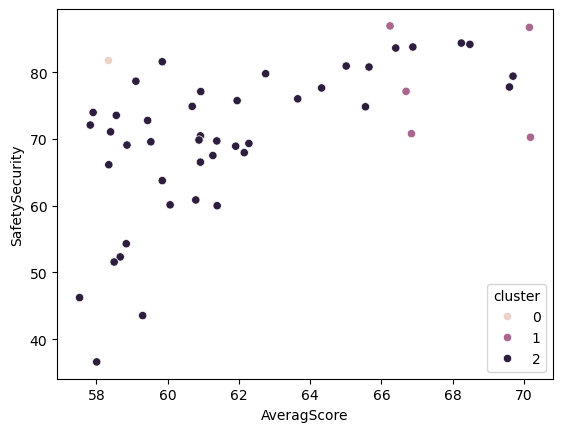

In [49]:
sns.scatterplot(x=df2['AveragScore'], y=df2['SafetySecurity'], hue=df['cluster'])

<Axes: xlabel='AveragScore', ylabel='PersonelFreedom'>

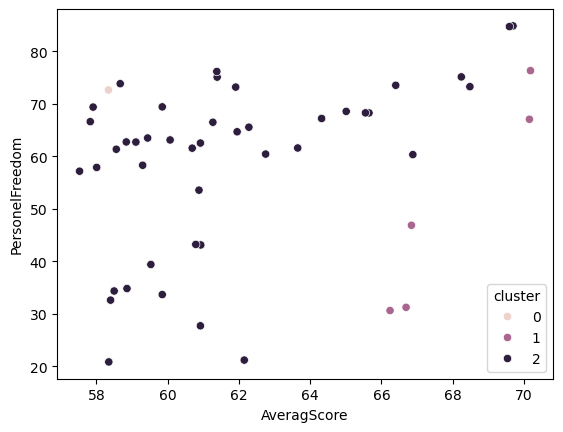

In [50]:
sns.scatterplot(x=df2['AveragScore'], y=df2['PersonelFreedom'], hue=df['cluster'])

<Axes: xlabel='AveragScore', ylabel='Governance'>

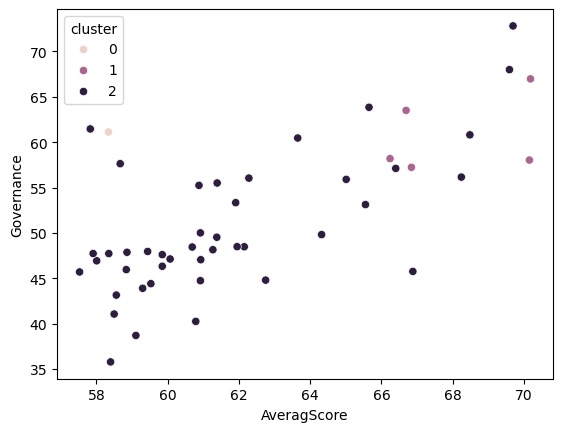

In [51]:
sns.scatterplot(x=df2['AveragScore'], y=df2['Governance'], hue=df['cluster'])

<Axes: xlabel='AveragScore', ylabel='SocialCapital'>

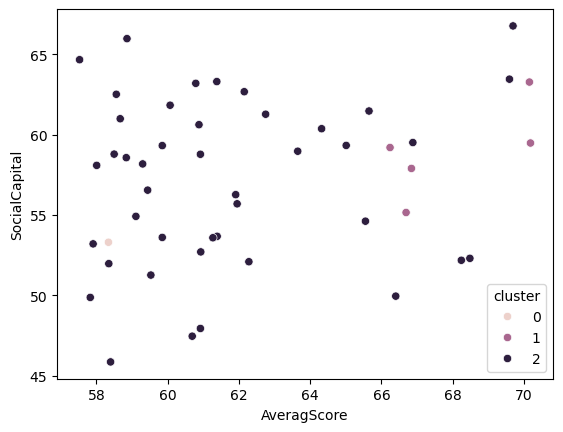

In [52]:
sns.scatterplot(x=df2['AveragScore'], y=df2['SocialCapital'], hue=df['cluster'])

<Axes: xlabel='AveragScore', ylabel='LivingConditions'>

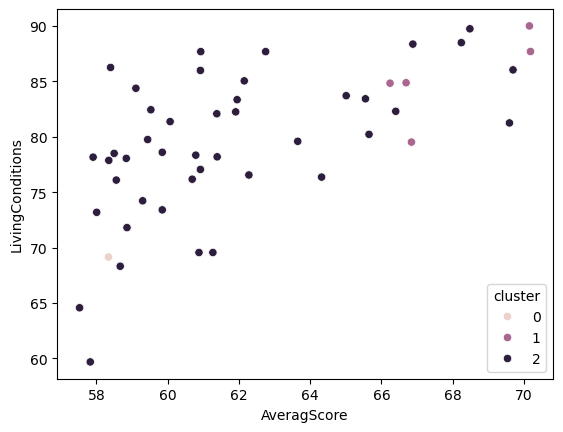

In [53]:
sns.scatterplot(x=df2['AveragScore'], y=df2['LivingConditions'], hue=df['cluster'])

<Axes: xlabel='AveragScore', ylabel='Health'>

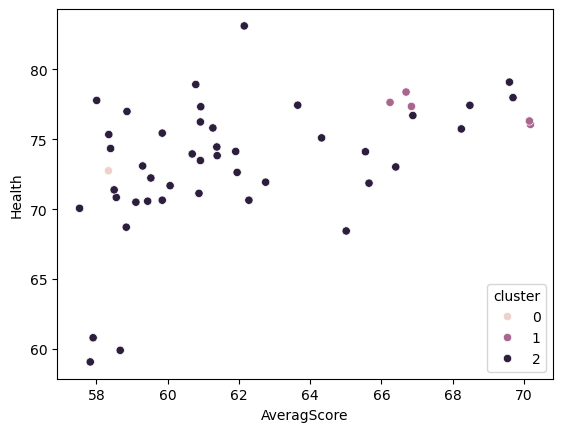

In [54]:
sns.scatterplot(x=df2['AveragScore'], y=df2['Health'], hue=df['cluster'])

<Axes: xlabel='AveragScore', ylabel='Education'>

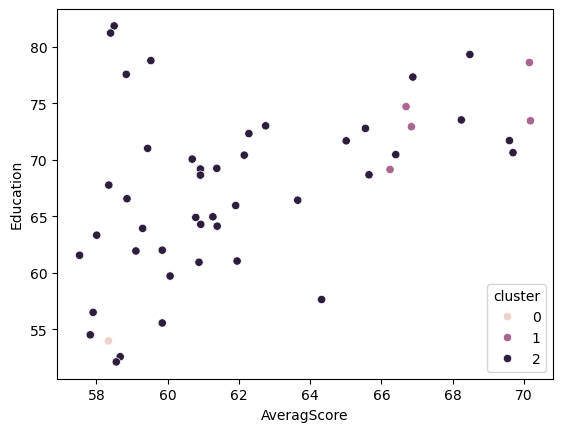

In [55]:
sns.scatterplot(x=df2['AveragScore'], y=df2['Education'], hue=df['cluster'])

<Axes: xlabel='AveragScore', ylabel='NaturalEnvironment'>

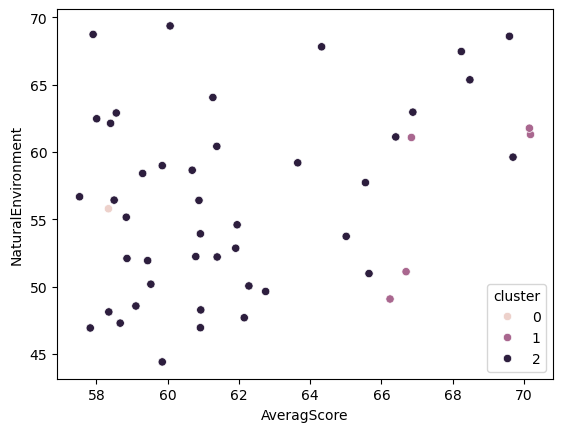

In [56]:
sns.scatterplot(x=df2['AveragScore'], y=df2['NaturalEnvironment'], hue=df['cluster'])

As we can see, the social variables don't seem to have as strong an impact on each individual cluster. The economic measurements clustered the data into three neat groups, whilst the social data had a harder time doing so. So, it appears that the economic measurements of the dataset have a stronger relationship to the average score of each country. 

This can indicate that when doing these measurements, the research group may have more reliable economic health data than social health data. This may also be affected by the difficulty in obtaining social metrics that accurately represent the entire population, as it is harder to get a complete picture of social health than economic health. This can also be due to the economics of a country driving the social satisfaction of said country.

On the other hand, this could possibly point to an unreliability within the social metrics that were used to collect the social health data. This could be due to misrepresentation in conduting research of the population or due to misleading research tactics.